In [1]:
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import sys
sys.path.append("..")
import jsq_ps_new.models as jsq
import aux.models as aux
plt.style.use('seaborn-whitegrid')

In [2]:
Rs = range(1, 11)
rhos = [round(x, 2) for x in np.linspace(0.01, 0.99, 99)]

In [3]:
uniform_data = {}
for rho in tqdm.tqdm_notebook(rhos):
    for R in Rs:
        cdf = pd.read_csv(f'sweep-uniform/uniform-R={R}-rho={rho}.csv', index_col=0)
        uniform_data[(R, rho)] = cdf

In [4]:
expon_data = {}
for rho in tqdm.tqdm_notebook(rhos):
    for R in Rs:
        try:
            cdf = pd.read_csv(f'sweep-expon/expon-R={R}-rho={rho}.csv', index_col=0)
            expon_data[(R, rho)] = cdf
        except:
            pass

In [5]:
def get_wasserstein(R, rho):
    try:
        return aux.wasserstein_distance(uniform_data[(R, rho)]['cdf'], expon_data[(R, rho)]['cdf'], 0.01)
    except KeyError:
        return np.nan

In [6]:
Ws = []
for R in Rs:
    Ws.append([])
    for rho in rhos:
        Ws[-1].append(get_wasserstein(R, rho))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  # Remove the CWD from sys.path while we load stuff.


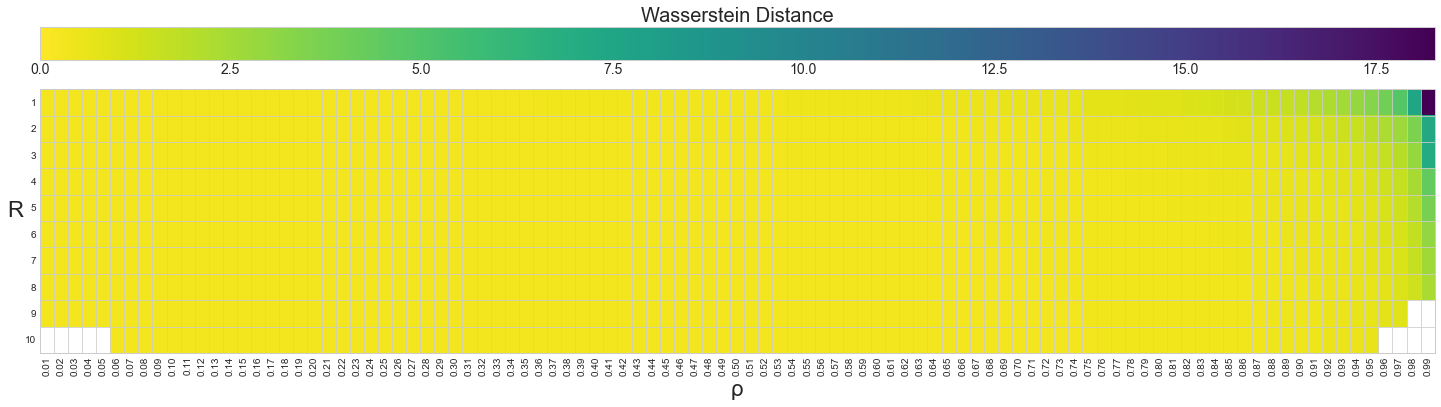

In [7]:
Rs = list(range(1, 11))
rhos = [round(r, 2) for r in np.linspace(0.01, 0.99, 99)]

fig, (cax, ax) = plt.subplots(nrows=2, figsize=(25, 6),  gridspec_kw={"height_ratios":[0.125, 1]})
mappable = ax.imshow(Ws, aspect='auto', cmap='viridis_r', vmin=0)
ax.set_ylabel('R', fontsize=22, rotation=0, labelpad=10)
ax.set_xlabel('ρ', fontsize=22, rotation=0)

# colorbar
cbar = fig.colorbar(mappable, orientation = "horizontal", cax=cax)
cbar.set_label('Wasserstein Distance', fontsize=20, labelpad=-70)
cbar.ax.tick_params(labelsize=14)

# y-ticks
ax.set_yticks([R - 0.5 for R in Rs])
ax.set_yticks([R - 1 for R in Rs], minor=True)
ax.set_yticklabels(Rs, minor=True)
ax.set_yticklabels([])

# x-ticks
ax.set_xticks([r - 0.5 for r in range(len(rhos))])
ax.set_xticks([r for r in range(len(rhos))], minor=True)
ax.set_xticklabels([])
ax.set_xticklabels([str.ljust(str(n), 4, '0') for n in rhos], minor=True, rotation=90,)

fig.savefig('uniform-expon-dists.pdf', bbox_inches='tight')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  if sys.path[0] == '':


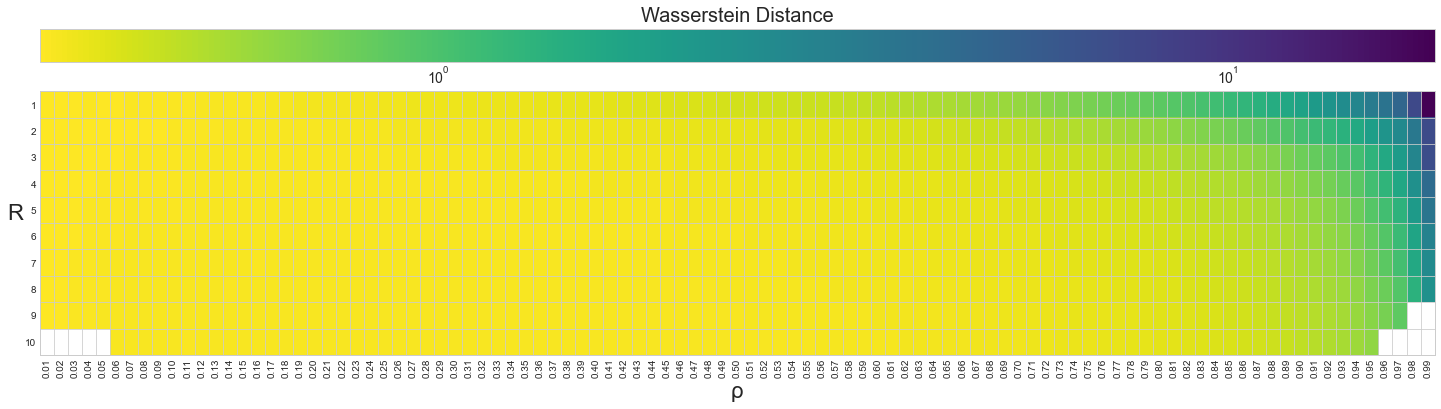

In [8]:
Rs = list(range(1, 11))
rhos = [round(r, 2) for r in np.linspace(0.01, 0.99, 99)]
minW = min([min(row) for row in Ws])
maxW = max([max(row) for row in Ws])

fig, (cax, ax) = plt.subplots(nrows=2, figsize=(25, 6),  gridspec_kw={"height_ratios":[0.125, 1]})
mappable = ax.imshow(Ws, aspect='auto', cmap='viridis_r',  norm=colors.LogNorm(vmin=minW, vmax=maxW))
ax.set_ylabel('R', fontsize=22, rotation=0, labelpad=10)
ax.set_xlabel('ρ', fontsize=22, rotation=0)

# colorbar
cbar = fig.colorbar(mappable, orientation = "horizontal", cax=cax)
cbar.set_label('Wasserstein Distance', fontsize=20, labelpad=-80)
cbar.ax.tick_params(labelsize=14)

# y-ticks
ax.set_yticks([R - 0.5 for R in Rs])
ax.set_yticks([R - 1 for R in Rs], minor=True)
ax.set_yticklabels(Rs, minor=True)
ax.set_yticklabels([])

# x-ticks
ax.set_xticks([r - 0.5 for r in range(len(rhos))])
ax.set_xticks([r for r in range(len(rhos))], minor=True)
ax.set_xticklabels([])
ax.set_xticklabels([str.ljust(str(n), 4, '0') for n in rhos], minor=True, rotation=90,)

fig.savefig('uniform-expon-dists-logscale.pdf', bbox_inches='tight')